In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('player_stats.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'player_stats.csv'

In [ ]:
df.shape

NameError: name 'df' is not defined

In [315]:
df['fantasy_points']

0         12.7
1          5.1
2          0.2
3          3.5
4          3.9
          ... 
129736     4.8
129737     1.6
129738    -0.4
129739     4.1
129740     6.0
Name: fantasy_points, Length: 129741, dtype: float64

In [307]:
df[df['passing_epa'] > 0]['passing_epa'] 

17        12.898533
19        12.639497
21         9.325317
22        18.277332
25         4.606288
            ...    
129718    12.062857
129719    14.460875
129722     1.732920
129723     5.105916
129724     2.136096
Name: passing_epa, Length: 8467, dtype: float64

In [266]:
df['position'].replace('HB', 'RB', inplace=True)
df['position'].replace('FB', 'RB', inplace=True) 
df['position'].unique()

array(['RB', 'QB', 'WR', 'TE', 'P', 'LS', 'G', 'K', 'CB', 'DB', nan, 'LB',
       'T', 'MLB', 'FS', 'SS', 'C', 'ILB', 'OLB', 'DT', 'NT', 'OG', 'OT',
       'DE', 'OL', 'DL', 'S'], dtype=object)

In [267]:
positions = ['RB', 'QB', 'WR', 'TE']
filtered_df = df[df['position_group'].isin(positions)]
pos_season_df = filtered_df.groupby(['position', 'season'])['fantasy_points_ppr'].sum().reset_index()
pos_season_avg_df = filtered_df.groupby(['position', 'season'])['fantasy_points_ppr'].mean().reset_index()
pivot_sum_df = pos_season_df.pivot(index='season', columns='position', values='fantasy_points_ppr')
pivot_mean_df = pos_season_avg_df.pivot(index='season', columns='position', values='fantasy_points_ppr')

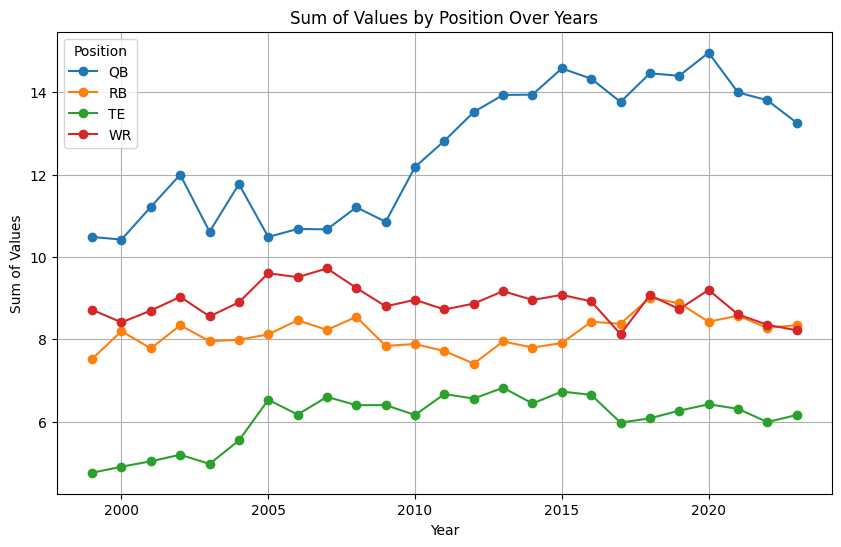

In [268]:
plt.figure(figsize=(10, 6))
for column in pivot_mean_df.columns:
    plt.plot(pivot_mean_df.index, pivot_mean_df[column], marker='o', label=column)

plt.title('Sum of Values by Position Over Years')
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.legend(title='Position')
plt.grid(True)

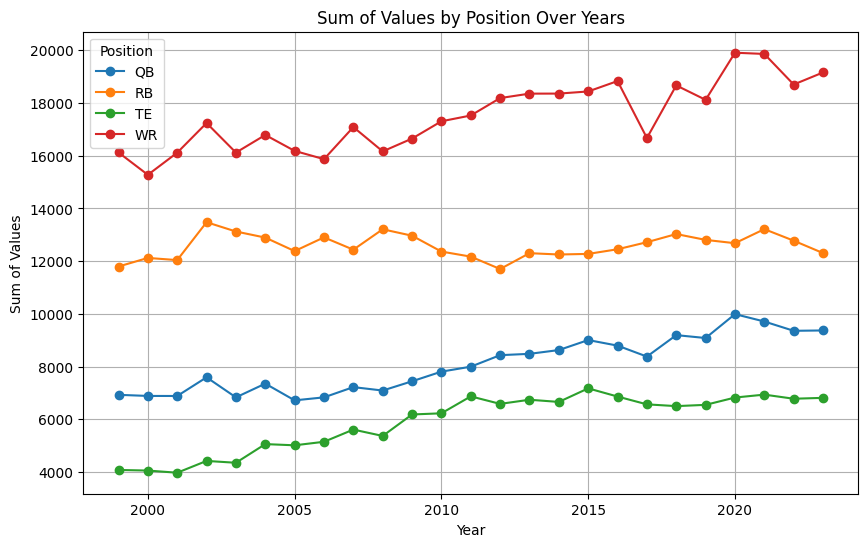

In [269]:
plt.figure(figsize=(10, 6))
for column in pivot_sum_df.columns:
    plt.plot(pivot_sum_df.index, pivot_sum_df[column], marker='o', label=column)

plt.title('Sum of Values by Position Over Years')
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.legend(title='Position')
plt.grid(True)

In [270]:
season_df = filtered_df.groupby('season')['fantasy_points_ppr'].sum().reset_index().set_index('season')

coef = np.polyfit(season_df.index, season_df['fantasy_points_ppr'], 1)
trendline = np.poly1d(coef)

print("Slope:", coef[0])
print("Intercept:", coef[1])


Slope: 424.53416923078936
Intercept: -809676.3343231177


<Figure size 1000x600 with 0 Axes>

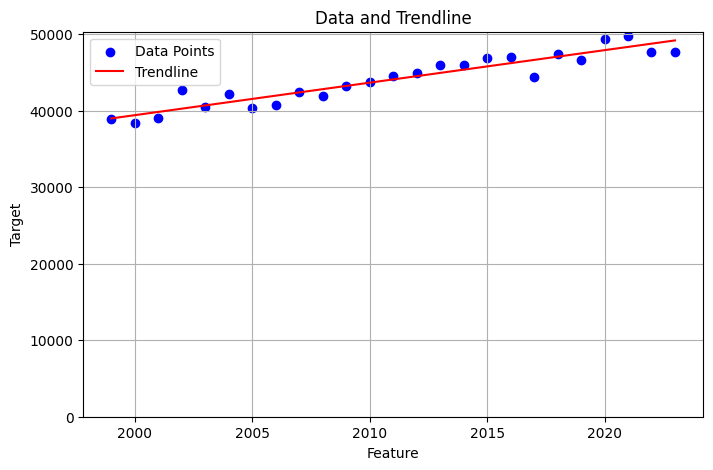

In [271]:
x_trend = np.linspace(season_df.index.min(), season_df.index.max(), 100)
y_trend = trendline(x_trend)

plt.figure(figsize=(10, 6))
plt.figure(figsize=(8, 5))
plt.scatter(season_df.index, season_df['fantasy_points_ppr'], color='blue', label='Data Points')  # Scatter plot of the data
plt.plot(x_trend, y_trend, color='red', label='Trendline')  # Line plot for the trendline
plt.ylim(0)
plt.title('Data and Trendline')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [272]:
start_value = season_df['fantasy_points_ppr'].iloc[0]
print(coef[0] / start_value * 100) 

1.0904784599182897


In [273]:
players_df = pd.read_csv('players.csv')
players_df.rename(columns={'gsis_id': 'player_id'}, inplace=True)

points_df = df.groupby('player_id')['fantasy_points_ppr'].sum().reset_index()[['player_id', 'fantasy_points_ppr']]
ppg_df = df.groupby('player_id')['fantasy_points_ppr'].mean().reset_index()[['player_id', 'fantasy_points_ppr']].rename(columns={'fantasy_points_ppr': 'ppg'})
players_df = pd.merge(players_df, points_df, on='player_id', how='inner')
players_df = pd.merge(players_df, ppg_df, on='player_id', how='inner')
players_df.columns

Index(['status', 'display_name', 'first_name', 'last_name', 'esb_id',
       'player_id', 'suffix', 'birth_date', 'college_name', 'position_group',
       'position', 'jersey_number', 'height', 'weight', 'years_of_experience',
       'team_abbr', 'team_seq', 'current_team_id', 'football_name',
       'entry_year', 'rookie_year', 'draft_club', 'college_conference',
       'status_description_abbr', 'status_short_description', 'gsis_it_id',
       'short_name', 'smart_id', 'headshot', 'draft_number', 'uniform_number',
       'draft_round', 'season', 'fantasy_points_ppr', 'ppg'],
      dtype='object')

In [282]:
rounds = 4
bin_size = 16

position_mask = players_df['position'].isin(['QB', 'RB', 'WR', 'TE'])
round_mask = players_df['draft_number'] <= 32 * rounds+1
filtered_players = players_df[position_mask & round_mask]
lowest_count = min(filtered_players.groupby('position').count()['status'])
optimal_bin_size = int(2 * np.cbrt(lowest_count))
bin_size =  bin_size if bin_size else optimal_bin_size

In [283]:
bins = [pick*bin_size for pick in range(0, rounds*2+1)]
labels = [f'{pick//2+1}.{pick*bin_size%32+1} - {pick//2+1}.{pick*bin_size%32+bin_size}' for pick in range(0, rounds*2)]
players_df['draft_bin'] = pd.cut(players_df['draft_number'], bins=bins, labels=labels, right=True)

C:\Users\simer\AppData\Local\Temp\ipykernel_23808\733799029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  position_bin_avg = filtered_players.groupby(['position', 'draft_bin'])['ppg'].mean().unstack().T


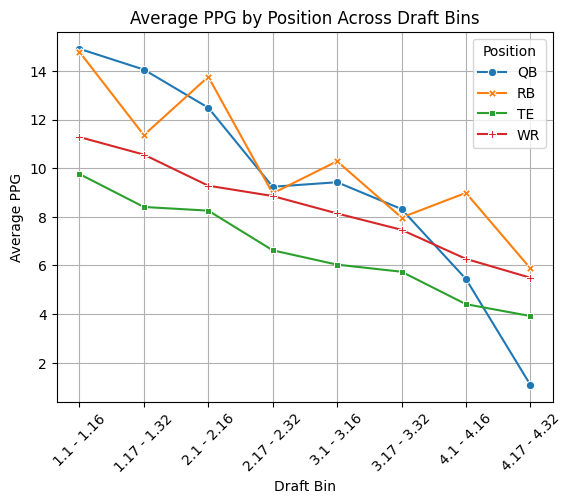

In [284]:
position_bin_avg = filtered_players.groupby(['position', 'draft_bin'])['ppg'].mean().unstack().T
sns.lineplot(data=position_bin_avg, markers=True, dashes=False)
plt.title('Average PPG by Position Across Draft Bins')
plt.xlabel('Draft Bin')
plt.ylabel('Average PPG')
plt.xticks(rotation=45)
plt.legend(title='Position')
plt.grid(True)

# Show the plot
plt.show()

C:\Users\simer\AppData\Local\Temp\ipykernel_23808\324779606.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  position_bin_avg = filtered_players.groupby(['position', 'draft_bin'])['fantasy_points_ppr'].mean().unstack().T


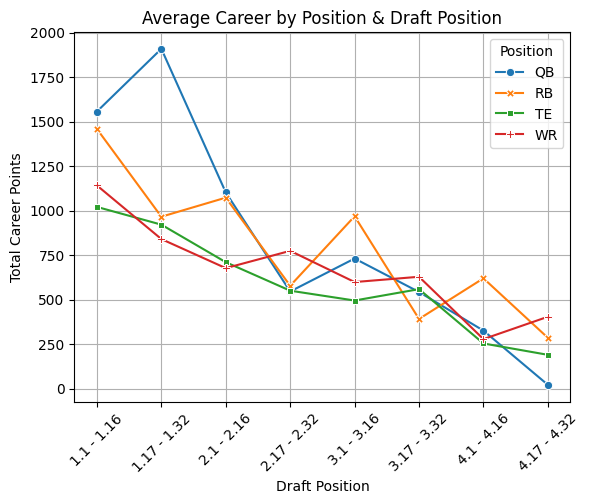

In [285]:
position_bin_avg = filtered_players.groupby(['position', 'draft_bin'])['fantasy_points_ppr'].mean().unstack().T
sns.lineplot(data=position_bin_avg, markers=True, dashes=False)
plt.title('Average Career by Position & Draft Position')
plt.xlabel('Draft Position')
plt.ylabel('Total Career Points')
plt.xticks(rotation=45)
plt.legend(title='Position')
plt.grid(True)

# Show the plot
plt.show()